In [1]:
# Création de plot pour les données LIDAR

## modules et configuration du notebook

### configuration du notebook

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

### modules

In [3]:
# Pour cacher les warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import netCDF4 as nc

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

plt.rcParams['figure.figsize'] = 13.66, 7.68

## Lecture des données

In [4]:
nc_id = nc.Dataset('data/cl31_1a_z1Ppr2R15mF30s_v02_20160926_000000_1440.nc', 'r')

# lecture du temps et convertion en objet datetime (x-axis)
# dans ces fichiers l'unité ne respecte pas la convention CF donc je corrige.
time = nc.num2date(nc_id.variables['time'][:], units=nc_id.variables['time'].units.replace('/', '-'))

# altitude (y-axis)
altitude = nc_id.variables['range'][:]
altitude_units = nc_id.variables['range'].units

# RCS (range corrected signal), les niveaux de couleurs
rcs = nc_id.variables['pr2'][:] * 1.e-8

# filtrage des données négatives
rcs[rcs < 0] = np.nan

# CBH (altitude de la couche des nuages)
cbh = nc_id.variables['cbh'][:]

nc_id.close()

## Traçage des données

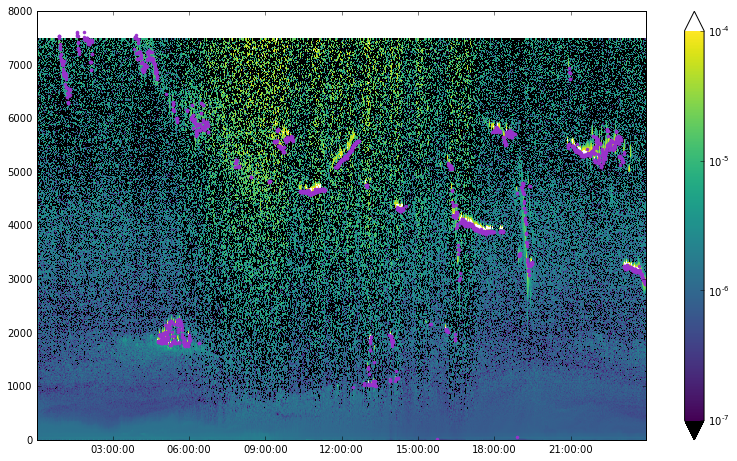

In [5]:
# création de la zone de tracage
fig, ax = plt.subplots(1)

# création du plot en 2.5D. On fixe les limites de valeurs 
plt_rcs = ax.pcolormesh(time, altitude, rcs.transpose(), cmap='viridis', norm=LogNorm(vmin=1.e-7, vmax=1.e-4))
plt_rcs.cmap.set_over('white') # valeurs au-dessus de la limite 1.e-4 en blanc
plt_rcs.cmap.set_under('black') # valeurs au-dessous de la limite 1.e-7 en noir
plt_rcs.cmap.set_bad('black') # valeurs manquantes en noir

# ajout d'une colorbar
cb = plt.colorbar(plt_rcs, extend='both')
cb.outline.set_edgecolor('black')

# ajout CBH, on créé un axe a gauche
plt_cbh = ax.plot(time, cbh, linestyle='None', marker='.', markeredgecolor='darkorchid', markerfacecolor='darkorchid')
